# Import Libraries

In [1]:
# Scientific 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as  plt
import seaborn as sns


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Deep Learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Others
import warnings
warnings.filterwarnings('ignore')

2023-12-18 16:20:50.372729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Dataset

In [2]:
data = pd.read_excel(r'../dataset/movie-dataset.xlsx')

# Data Exploration

In [3]:
data.head(data.shape[0])

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate_Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Child 44,2015,6.4,4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN
227,Aloha,2015,5.5,15,21000000,37000000.0,2815.0,1,13,7119456,18803,1128,2290,NaN
228,Unfinished Business,2015,5.4,8,10200000,35000000.0,2777.0,1,7,3450614,6823,325,409,NaN
229,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


In [4]:
data.shape

(231, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                231 non-null    object 
 1   Year                 231 non-null    int64  
 2   Ratings              231 non-null    float64
 3   Genre                231 non-null    int64  
 4   Gross                231 non-null    int64  
 5   Budget               230 non-null    float64
 6   Screens              221 non-null    float64
 7   Sequel               231 non-null    int64  
 8   Sentiment            231 non-null    int64  
 9   Views                231 non-null    int64  
 10  Likes                231 non-null    int64  
 11  Dislikes             231 non-null    int64  
 12  Comments             231 non-null    int64  
 13  Aggregate_Followers  196 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB


In [6]:
np.unique(data.Genre, return_counts=True)

(array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 12, 15]),
 array([65, 12, 46,  1,  3,  2, 54, 13, 12, 13, 10]))

In [7]:
np.unique(data.Sequel, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]), array([188,  25,   8,   3,   4,   1,   2]))

In [8]:
data.describe()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate_Followers
count,231.000000,231.000000,231.000000,2.310000e+02,2.300000e+02,221.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,1.960000e+02
mean,2014.294372,6.441558,5.359307,6.806603e+07,4.792173e+07,2209.244344,1.359307,2.809524,3.712851e+06,12732.536797,679.051948,1825.701299,3.038193e+06
std,0.456750,0.988765,4.141611,8.890289e+07,5.428825e+07,1463.767755,0.967241,6.996775,4.511104e+06,28825.484481,1243.929481,3571.040447,4.886278e+06
min,2014.000000,3.100000,1.000000,2.470000e+03,7.000000e+04,2.000000,1.000000,-38.000000,6.980000e+02,1.000000,0.000000,0.000000,1.066000e+03
25%,2014.000000,5.800000,1.000000,1.030000e+07,9.000000e+06,449.000000,1.000000,0.000000,6.233020e+05,1776.500000,105.500000,248.500000,1.830250e+05
50%,2014.000000,6.500000,3.000000,3.740000e+07,2.800000e+07,2777.000000,1.000000,0.000000,2.409338e+06,6096.000000,341.000000,837.000000,1.052600e+06
75%,2015.000000,7.100000,8.000000,8.935000e+07,6.500000e+07,3372.000000,1.000000,5.500000,5.217380e+06,15247.500000,697.500000,2137.000000,3.694500e+06
max,2015.000000,8.700000,15.000000,6.430000e+08,2.500000e+08,4324.000000,7.000000,29.000000,3.262678e+07,370552.000000,13960.000000,38363.000000,3.103000e+07


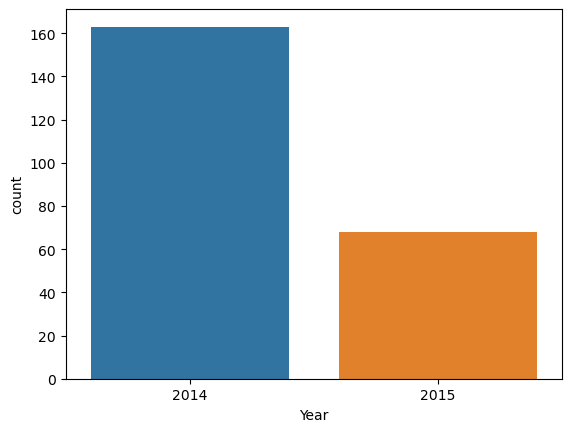

In [9]:
sns.countplot(data=data, x='Year')
plt.show()

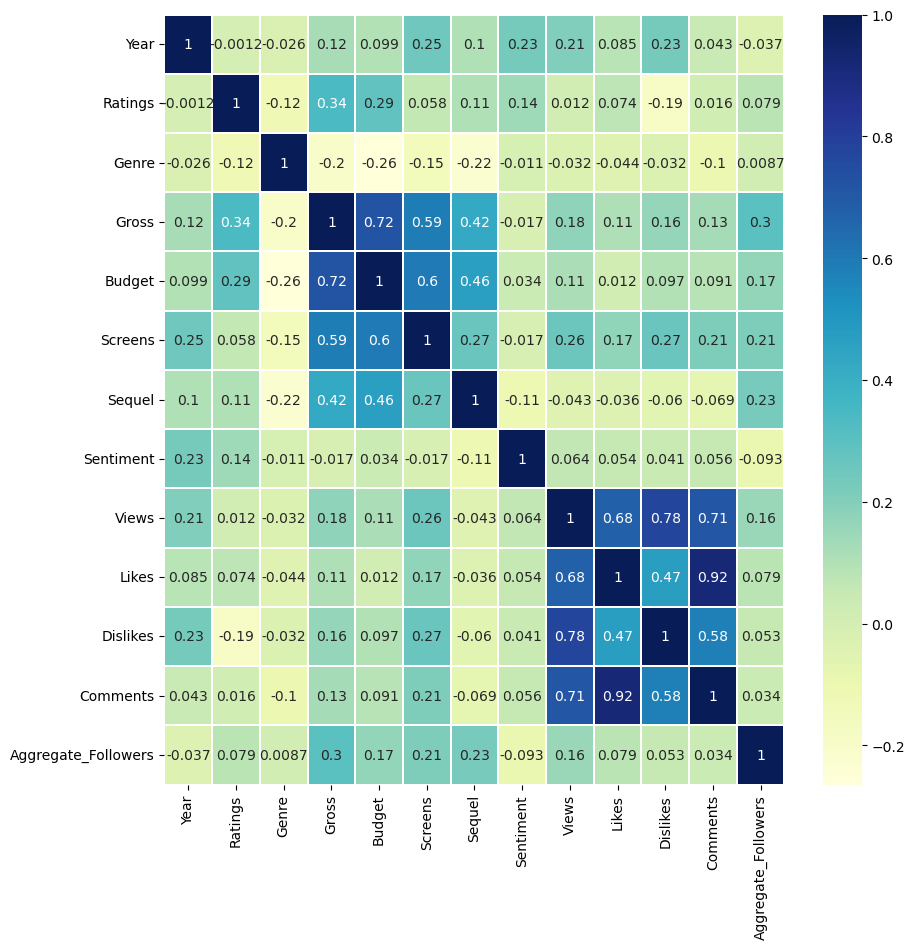

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop('Movie', axis=1).corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

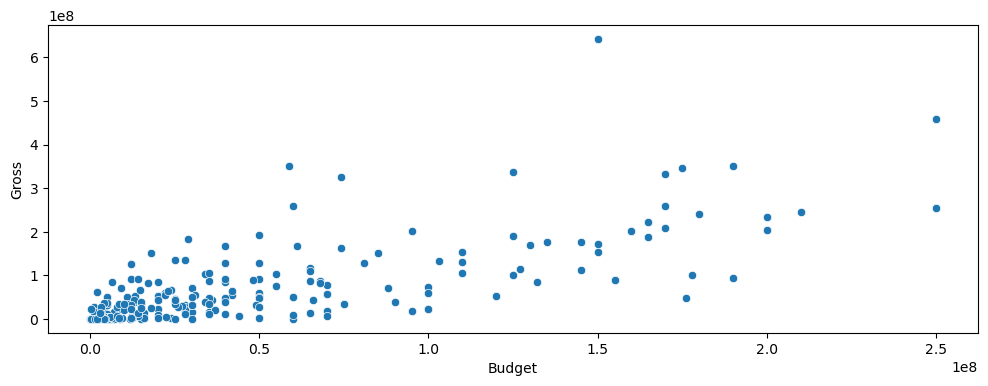

In [11]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=data, x="Budget", y="Gross")
plt.show()

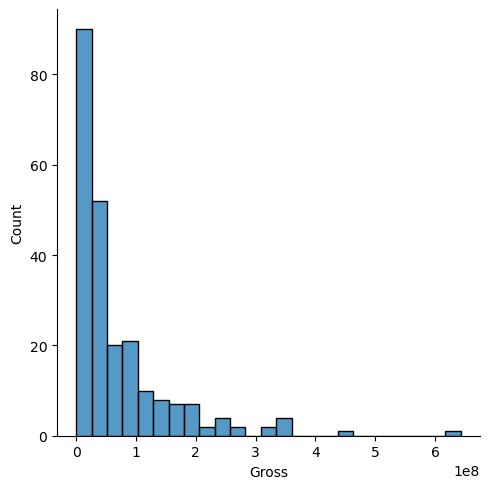

In [12]:
sns.displot(data=data, x='Gross')
plt.show()

# Data Preproccessing

In [13]:
# lowercase all feature names
data.rename(str.lower, axis='columns', inplace=True)

In [14]:
# remove NaN values and duplicates
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Train Test Split

In [15]:
#X = data.drop(['movie', 'gross'], axis=1)
X = data[['budget', 'sequel', 'screens']]
y = data.gross

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [18]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Fit Model

## Decission Tree

In [19]:
dt_model = DecisionTreeRegressor(max_depth=2)
_ = dt_model.fit(X_train_scaled, y_train_scaled)

In [20]:
y_pred_dt= dt_model.predict(X_test_scaled)

In [21]:
dt_mse = mean_squared_error(y_test_scaled, y_pred_dt)
print(f"The mse of decission tree is: {dt_mse}")

dt_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_dt))
print(f"The rmse of decission tree is: {dt_mse}")

dt_mae = mean_absolute_error(y_test_scaled, y_pred_dt)
print(f"The mae of decission tree is: {dt_mae}")

The mse of decission tree is: 0.5714395573323283
The rmse of decission tree is: 0.5714395573323283
The mae of decission tree is: 0.5534821059762283


## Neural Network

In [22]:
nn_model = Sequential()
nn_model.add((Dense(128, input_dim=X_train_scaled.shape[1], activation='relu')))
nn_model.add((Dense(64, activation='relu')))
nn_model.add((Dense(32, activation='relu')))

nn_model.add((Dense(1, activation='linear')))

2023-12-18 16:20:59.509341: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [24]:
nn_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [25]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = nn_model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
4/4 - 3s - loss: 0.9725 - val_loss: 0.6801 - 3s/epoch - 725ms/step
Epoch 2/50
4/4 - 0s - loss: 0.8230 - val_loss: 0.6134 - 316ms/epoch - 79ms/step
Epoch 3/50
4/4 - 0s - loss: 0.6902 - val_loss: 0.5602 - 221ms/epoch - 55ms/step
Epoch 4/50
4/4 - 0s - loss: 0.6081 - val_loss: 0.5378 - 288ms/epoch - 72ms/step
Epoch 5/50
4/4 - 0s - loss: 0.5202 - val_loss: 0.5317 - 345ms/epoch - 86ms/step
Epoch 6/50
4/4 - 0s - loss: 0.4581 - val_loss: 0.5457 - 305ms/epoch - 76ms/step
Epoch 7/50
4/4 - 0s - loss: 0.4396 - val_loss: 0.5968 - 308ms/epoch - 77ms/step
Epoch 8/50
4/4 - 0s - loss: 0.4153 - val_loss: 0.6118 - 334ms/epoch - 83ms/step
Epoch 9/50
4/4 - 0s - loss: 0.4040 - val_loss: 0.6185 - 372ms/epoch - 93ms/step
Epoch 10/50
4/4 - 0s - loss: 0.3920 - val_loss: 0.6318 - 306ms/epoch - 76ms/step
Epoch 11/50
4/4 - 0s - loss: 0.3930 - val_loss: 0.6303 - 315ms/epoch - 79ms/step
Epoch 12/50
4/4 - 0s - loss: 0.3852 - val_loss: 0.5823 - 345ms/epoch - 86ms/step
Epoch 13/50
4/4 - 0s - loss: 0.3763 - v

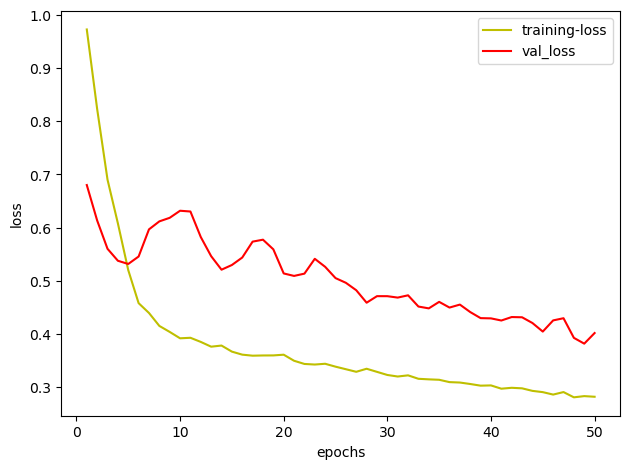

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='training-loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
y_pred_nn = nn_model.predict(X_test_scaled)

2/2 [==============================] - 0s 17ms/step


In [29]:
nn_mse = mean_squared_error(y_test_scaled, y_pred_nn)
print(f"The mse of neural net is: {nn_mse}")

nn_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_nn))
print(f"The rmse of neural net is: {nn_rmse}")

nn_mae = mean_absolute_error(y_test_scaled, y_pred_nn)
print(f"The mae of neural net is: {nn_mae}")

The mse of neural net is: 0.5713696459429545
The rmse of neural net is: 0.7558899694684105
The mae of neural net is: 0.5464731311349146


In [30]:
y_pred_nn[:5]

array([[-0.7181618 ],
       [-0.35670343],
       [-0.51968527],
       [ 1.1940238 ],
       [-0.19846877]], dtype=float32)

In [31]:
y_test_scaled[:5]

array([[-0.79379071],
       [-0.68302888],
       [ 0.08485998],
       [ 2.67581739],
       [-0.34127028]])